In [62]:
# Libraries and definitions for Raman lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
nm = 1e-9
cm = 1e-2
c = 299792458 # Speed of light in m/s

def import_image(name):
    """ Import an image and sum over rows. Image must be in same folder as Jupyter notebook. 
    Output:
        x_pixels = numpy list of pixels for the x-axis [0,1,2,...]
        img1d = sum over the rows of img to make a 1D numpy array
        img = the original image as a 2D numpy array"""
    # Import image to numpy array
    img = pd.read_csv(name, sep="\t", header=None)
    img = img.to_numpy() # convert to numpy array
    
    # Sum over rows to make 1D
    img1d = np.sum(img,0)
    x_pixels= np.arange(len(img1d))
    return x_pixels, img1d, img


def peak_finder(data, threshold):
    """ Finds the location of the peaks above a value 'threshold' in a 1D numpy array.
    Output:
        peaks = list indices of found peaks in data"""
    # Find peaks
    peaks, _ = find_peaks(data, height=threshold) # imported from scipy.signal
    
    # Plot spectrum and peaks
    plt.plot(data)
    plt.plot(peaks, data[peaks], "x") # plot cross at each peak
    plt.grid()
    
    # Plot a line at the threshold
    line = np.full_like(data, threshold) 
    plt.plot(line , "--", color="gray")
    
    # Label plot and print peak locations
    plt.xlabel("Pixels")
    plt.ylabel("Counts")
    plt.title("Peak finder")
    print("Peaks found at pixel locations: ", peaks)
    return peaks

def polynomial(x, a, b, c):
    """Polynomial model used for fitting neon peak locations"""
    return a + b*x + c*x**2

def calibrate_pixel_to_wavelength(pixel, peaks, wavelengths):
    """ Convert a list of pixels 'x_pixels' to wavelength 'x_wavelength'.
    Input:
        pixel = list of image pixels [0,1,2,3,...,512]
        peaks = list of the pixels of peaks in the neon image
        wavelengths (nm) = the wavelength of the corresponding peaks in 'peaks'
    Output:
        x_wavelength (nm) = the calibrated x-axis in wavelengths
    """
    # Plot the peak pixels and wavelengths  
    plt.plot(peaks, wavelengths,'.')
    plt.xlabel('Pixels')
    plt.ylabel('Wavelength (nm)')
    
    # Perform curve fit of a second order polynomial
    params, cov = curve_fit(polynomial, peaks, wavelengths, p0=[760,-1,0])
    print("Fitted parameters: ", params)
    plt.plot(peaks, polynomial(peaks, *params)) # * means to insert a list as multiple arguments of a function
    plt.show()
    
    # Use the model to convert pixels to wavelengths
    x_wavelength = polynomial(pixel, *params)
    
    return x_wavelength



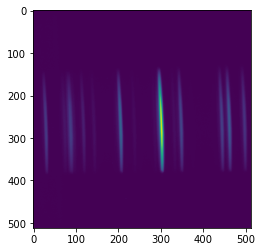

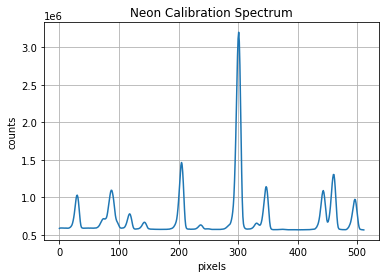

In [63]:
# Import the data and plot vs pixels
x_pixels, y_img1d, img = import_image("neon.TXT")

# Plot original image
plt.imshow(img)
plt.show()

# Plot image summed over rows
plt.plot(x_pixels, y_img1d) # sum over rows
plt.title('Neon Calibration Spectrum')
plt.xlabel('pixels')
plt.ylabel('counts')
plt.grid()
plt.show()



Peaks found at pixel locations:  [ 30  87 205 301 347 443 460]


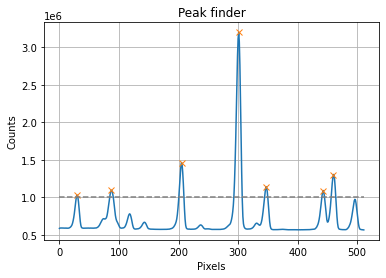

In [64]:
# Find the peaks
peaks = peak_finder(y_img1d, threshold=1e6)

array([13097.40540399, 13326.40360346, 13802.24148402, 14219.89647915,
       14431.05563172, 14887.59863034, 14973.87059581])

[ 30  87 205 301 347 443 460]
Fitted parameters:  [ 7.69996338e+02 -2.22213230e-01  5.54285960e-07]


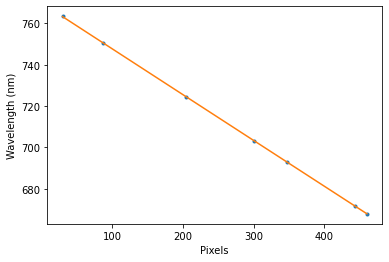

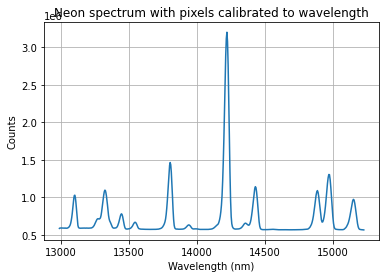

In [65]:
# Use peaks and corresponding wavelengths to convert pixels to wavelength
print(peaks)
wavelengths = np.array([763.51, 750.39, 724.52, 703.24, 692.95, 671.70, 667.83])

x_wavelengths = calibrate_pixel_to_wavelength(x_pixels, peaks, wavelengths)
plt.plot(x_wavelengths, y_img1d) # sum over rows
plt.xlabel('Wavelength (nm)')
plt.ylabel('Counts')
plt.title("Neon spectrum with pixels calibrated to wavelength")
plt.grid()
plt.show()

x_wavenumbers = 1/x_wavelengths*cm/nm # convert from wavelength (nm) to wavenumbers (cm^-1)


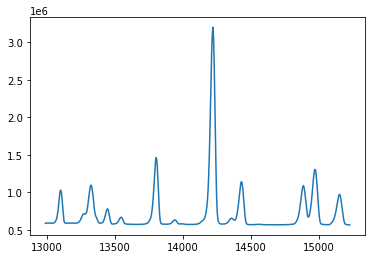

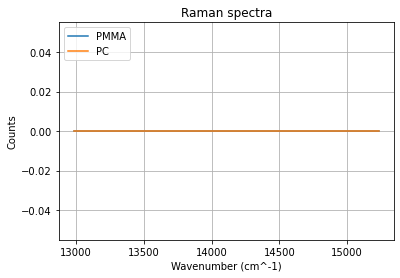

In [68]:

_, y_background, _  = import_image("background.txt")  # import_image outputs 3 variables, and we use _ to ignore 2 of them 
plt.plot(x_shifted, y_background)
plt.show()

_, y_PMMA, _ = import_image("PMMA.txt")
y_PMMA = y_PMMA - y_background # subtrack the background
plt.plot(x_shifted, y_PMMA)
plt.grid()
plt.xlabel("Wavenumber (cm^-1)")
plt.ylabel("Counts")
plt.title("PMMA")
plt.show()

_, y_PC, _ = import_image("PC.txt")
y_PC = y_PC - y_background # subtrack the background
plt.plot(x_shifted, y_PC, label= "PC")

plt.legend(loc="upper left") # loc determines where to put the legend
plt.grid()
plt.xlabel("Wavenumber (cm^-1)")
plt.ylabel("Counts")
plt.title("Raman spectra")
plt.show()

In [ ]:
h =